# Table of Contents

- Human Resources Department: Employee Turnover Prediction
    - Understanding the Business Problem
    - Loading Data Files
    - Exploring and Visualizing the Dataset
    - Data Preprocessing: Splitting and Cleaning
    - Logistic Regression: Model Training and Evaluation
    - Random Forest: Model Training and Evaluation
- Marketing Department: Customer Segmentation for Targeted Campaigns
    - Understanding the Business Problem
    - Loading Data Files
    - Exploring and Visualizing the Dataset
    - Finding the Optimal Number of Clusters and Applying the K-Means Method
    - Applying Principal Component Analysis
    - Performing Dimensionality Reduction Using Autoencoders

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Human Resources Department: Employee Turnover Prediction

## Understanding the Business Problem

The HR team has collected employee data and aims to use predictive modelling to predict which employees are at risk of leaving.

## Loading Data Files

In [4]:
employee_df = pd.read_csv('../data/raw/human-resources-department.csv')
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Exploring and Visualizing the Dataset

In [8]:
# Since 'Attrition,' 'OverTime,' and 'Over18' are binary columns,
# let's convert them into integers before conducting any visualizations.

employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x == 'Yes' else 0)

employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


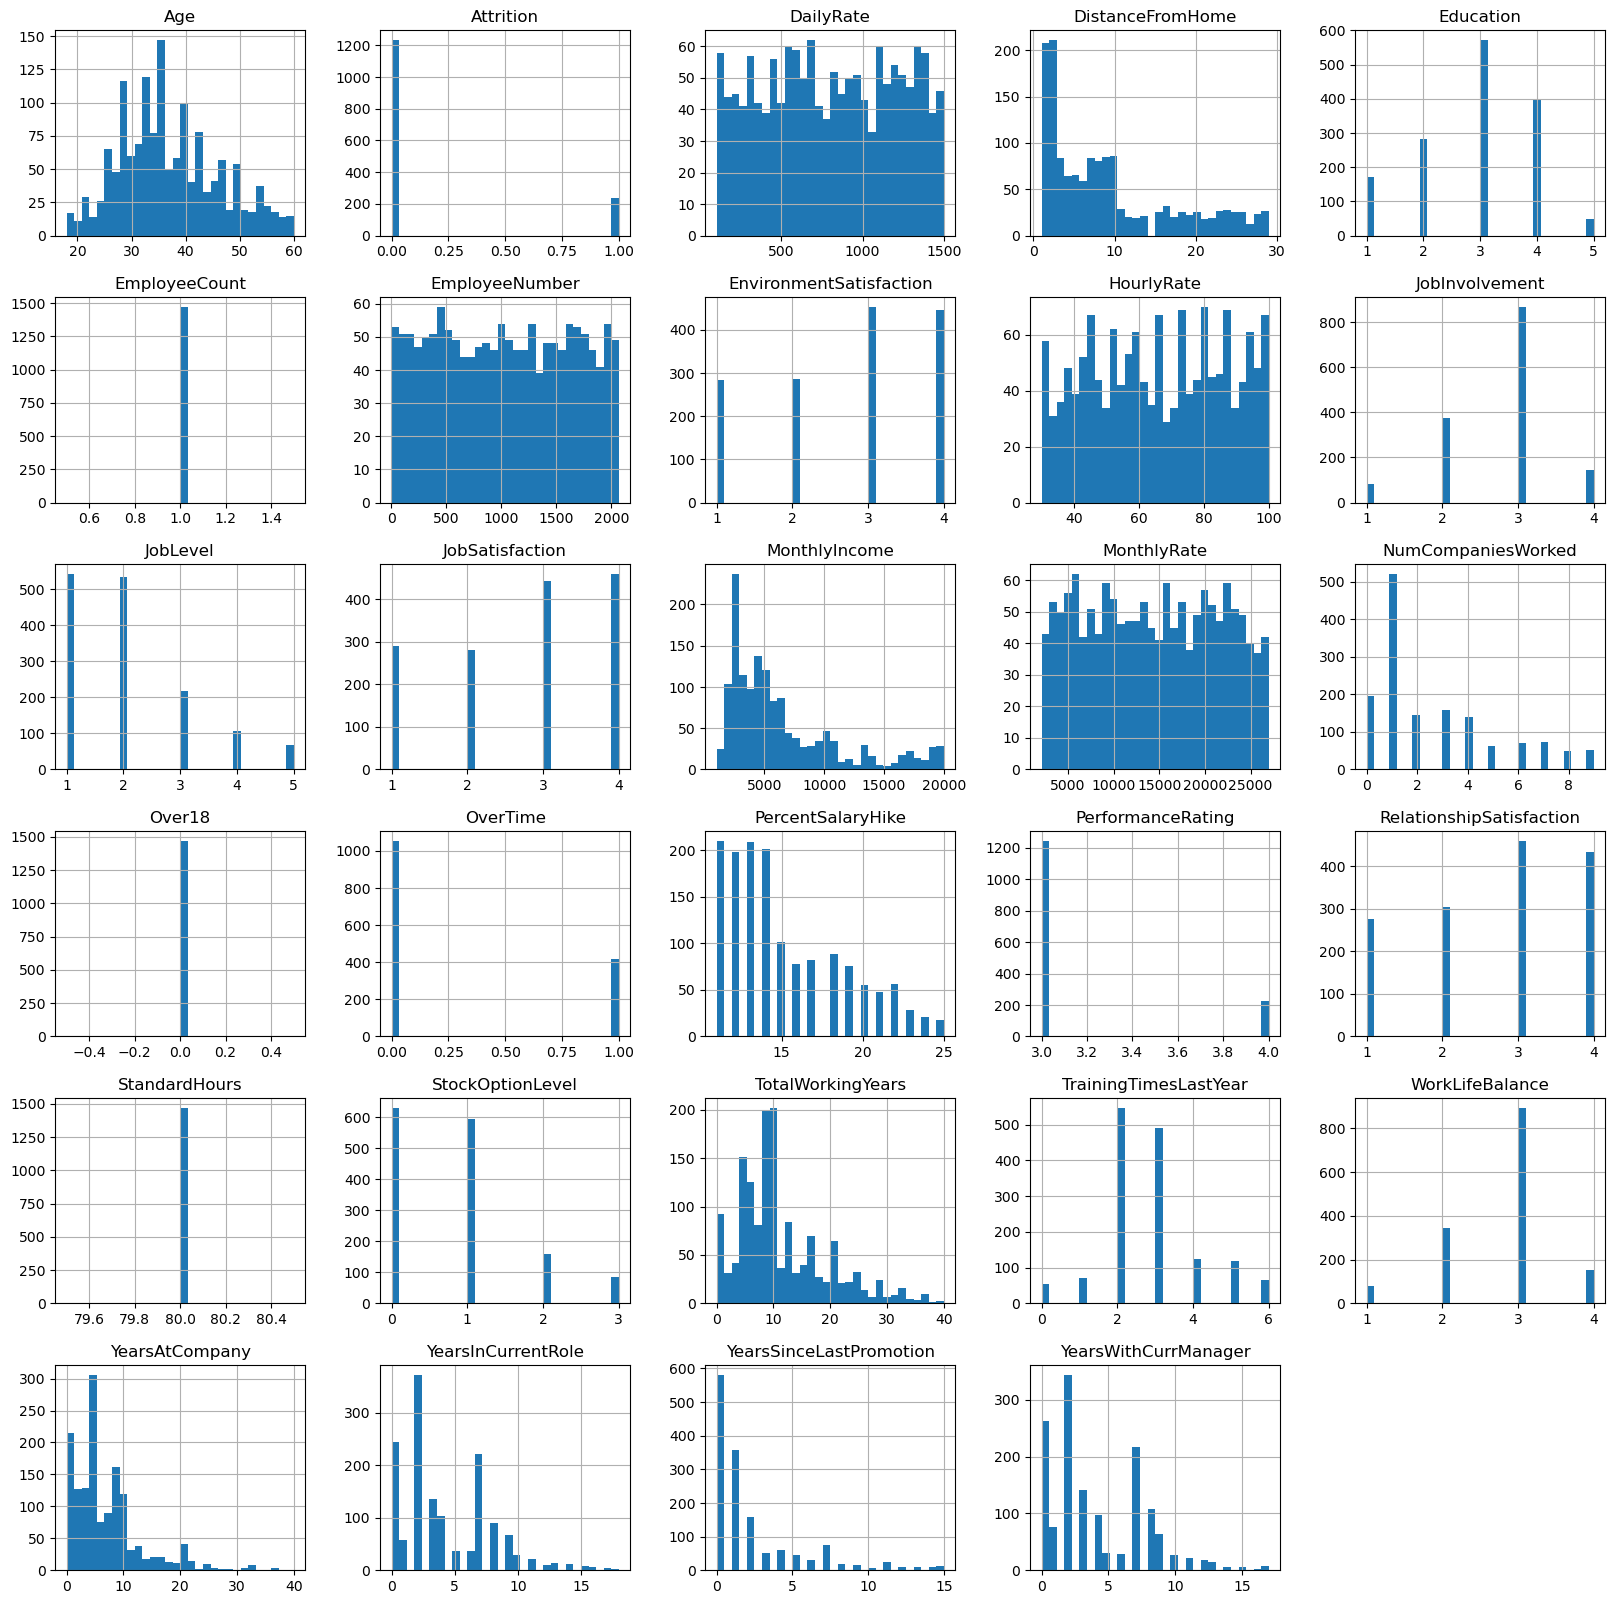

In [9]:
employee_df.hist(bins=30, figsize=(20,20));

# Some features like 'MonthlyIncome' and 'TotalWorkingYears' have a tail-heavy distribution.

In [10]:
employee_df['EmployeeNumber'].duplicated().sum()

# There are no duplicated values in the 'EmployeeNumber' column.

0

In [11]:
# Let's remove 'EmployeeCount,' 'StandardHours,' and 'Over18' since they do not vary among employees.
# Additionally, we should drop 'EmployeeNumber' because it doesn't offer meaningful information or patterns
# to predict a target variable. Including such identifiers in a model can cause overfitting,
# where the model memorizes specific employees rather than learning generalizable patterns.

employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'],
                 axis=1, inplace=True)
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [12]:
# How many employees have left the company?

employees_left = employee_df[employee_df['Attrition'] == 1]
employees_stayed = employee_df[employee_df['Attrition'] == 0]

total_employees = len(employee_df)
print(f'Total number of employees: {total_employees}')

num_employees_left = len(employees_left)
pct_employees_left = num_employees_left / total_employees * 100
print(f'Number of employees who left the company: {num_employees_left} ({pct_employees_left:.2f}%)')

num_employees_stayed = len(employees_stayed)
pct_employees_stayed = num_employees_stayed / total_employees * 100
print(f'Number of employees who stayed with the company: {num_employees_stayed} ({pct_employees_stayed:.2f}%)')

# The dataset is imbalanced.

Total number of employees: 1470
Number of employees who left the company: 237 (16.12%)
Number of employees who stayed with the company: 1233 (83.88%)


In [13]:
employees_left.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [14]:
employees_stayed.describe()

# Let's compare the average and standard deviation of the employees who stayed
# and those who left:
# 'Age': The average age of the employees who stayed is higher than that of those who left.
# 'DailyRate': The daily rate of the employees who stayed is higher.
# 'DistanceFromHome': Employees who stayed live closer to work.
# 'EnvironmentSatisfaction' and 'JobSatisfaction': Employees who stayed generally
# have higher environment and job satisfaction.
# 'StockOptionLevel': Employees who stayed tend to have a higher stock option level.

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


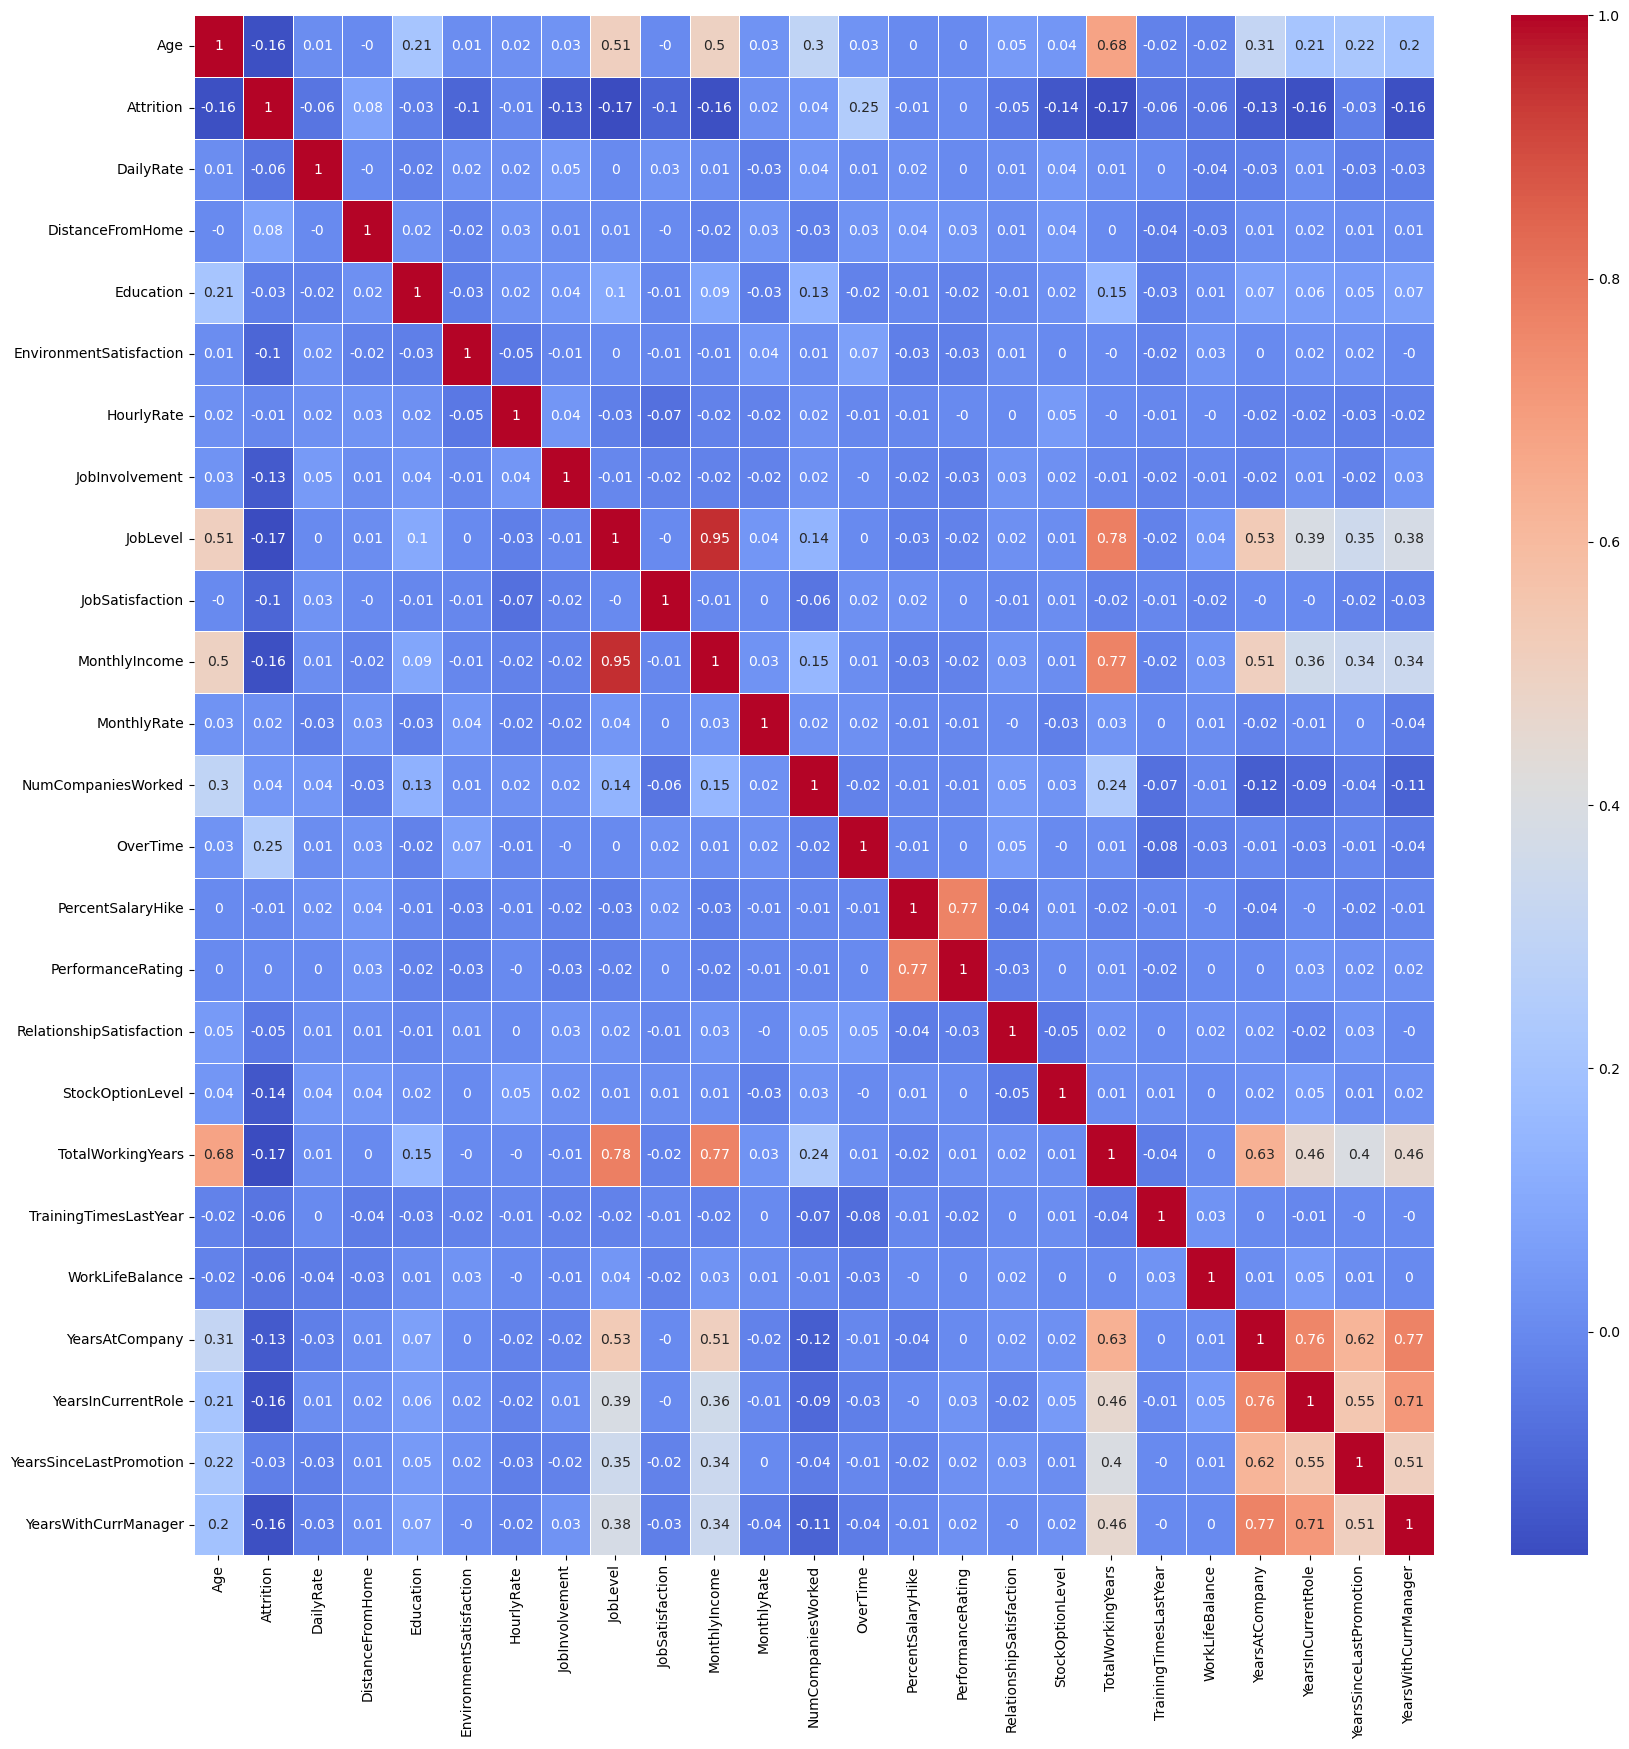

In [15]:
numeric_employee_df = employee_df.select_dtypes(include=['number'])
correlations = numeric_employee_df.corr()
correlations_rounded = correlations.round(2)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations_rounded, annot=True, cmap='coolwarm', linewidths=0.5);

# 'Age' is strongly correlated with 'TotalWorkingYears' (0.68), 'JobLevel' (0.51),
# and 'MonthlyIncome' (0.50).
# 'Attrition' is negatively correlated with 'JobLevel' (-0.17), 'YearsAtCompany' (-0.13),
# and 'JobSatisfaction' (-0.10).
# 'JobSatisfaction' and 'EnvironmentSatisfaction' correlate negatively with
# 'Attrition' (-0.10).
# 'YearsAtCompany' has strong positive correlations with 'YearsInCurrentRole' (0.76)
# and 'YearsWithCurrManager' (0.77).
# 'DistanceFromHome' has a slight positive correlation with 'Attrition' (0.08).
# 'OverTime' is positively correlated with 'Attrition' (0.25).

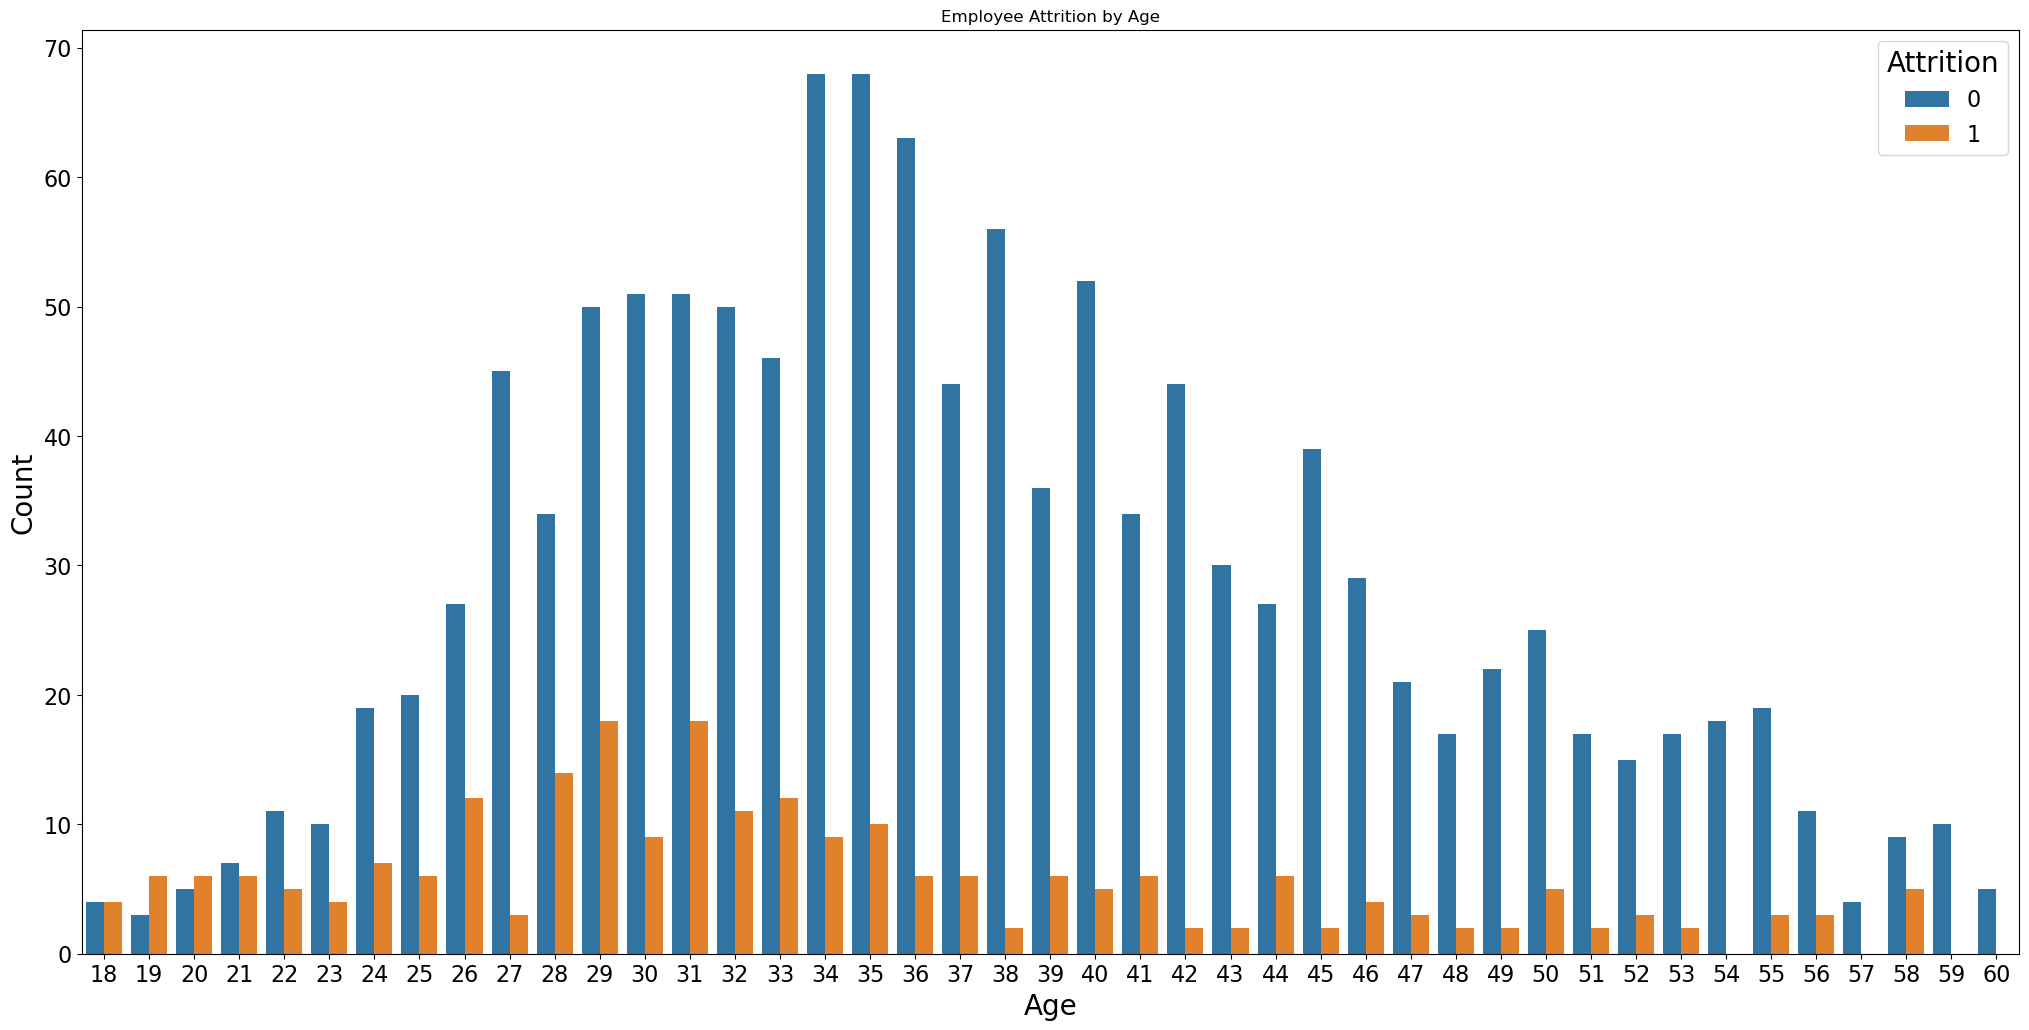

In [16]:
plt.figure(figsize=(25,12))
sns.countplot(x='Age', hue='Attrition', data=employee_df)
plt.title('Employee Attrition by Age')
plt.xlabel('Age', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Attrition', fontsize=16, title_fontsize=20);

# The orange bars (representing attrition) are generally smaller across all age groups compared to the blue bars
# (representing no attrition). This suggests that most employees stayed with the company across most age ranges.
# Attrition appears higher between the ages of 28 and 35, with ages 29 and 31 showing relatively more noticeable
# attrition compared to others.
# The peak age of employees in the company is between 28 and 36, as this range has the tallest blue bars
# (indicating the highest number of employees in these age groups). After age 40, the number of employees decreases gradually.
# Although there is some attrition across various ages, the highest numbers seem to be concentrated in the late 20s
# and early 30s. Employees younger than 25 and older than 45 experience less attrition compared to the middle-aged group
# (around 28 to 35).

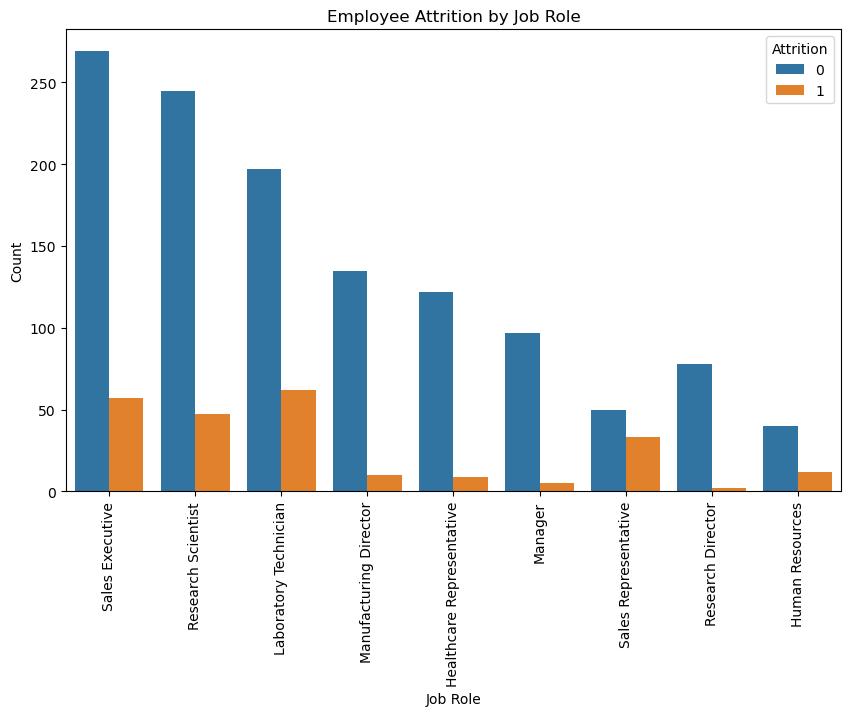

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='JobRole', hue='Attrition', data=employee_df)
plt.title('Employee Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=90);

# Sales representatives are likelier to leave than employees in other positions.

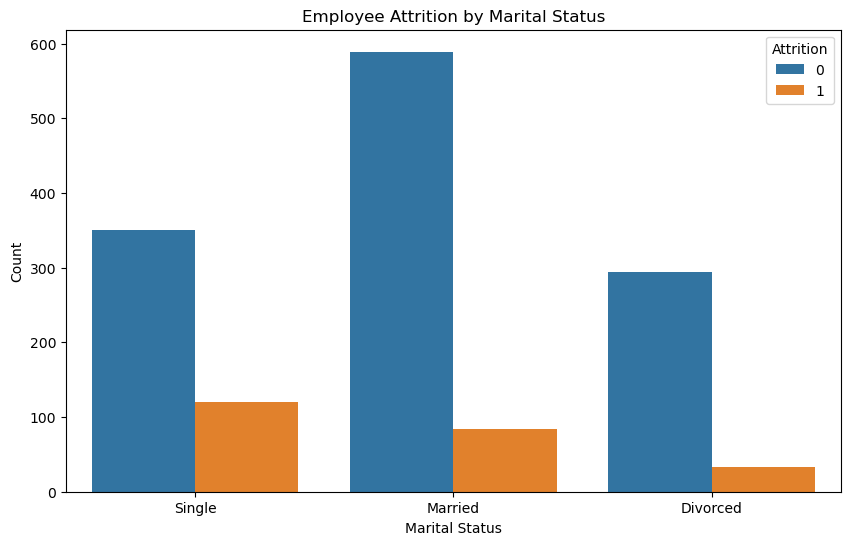

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalStatus', hue='Attrition', data=employee_df)
plt.title('Employee Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count');

# Single employees are more likely to leave the company than those who are married or divorced.

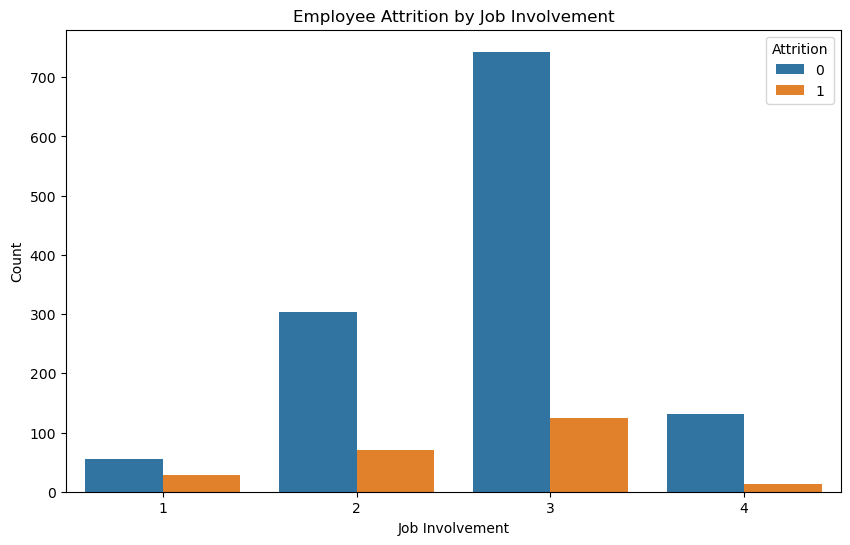

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='JobInvolvement', hue='Attrition', data=employee_df)
plt.title('Employee Attrition by Job Involvement')
plt.xlabel('Job Involvement')
plt.ylabel('Count');

# Employees who are less engaged are more likely to leave the company.

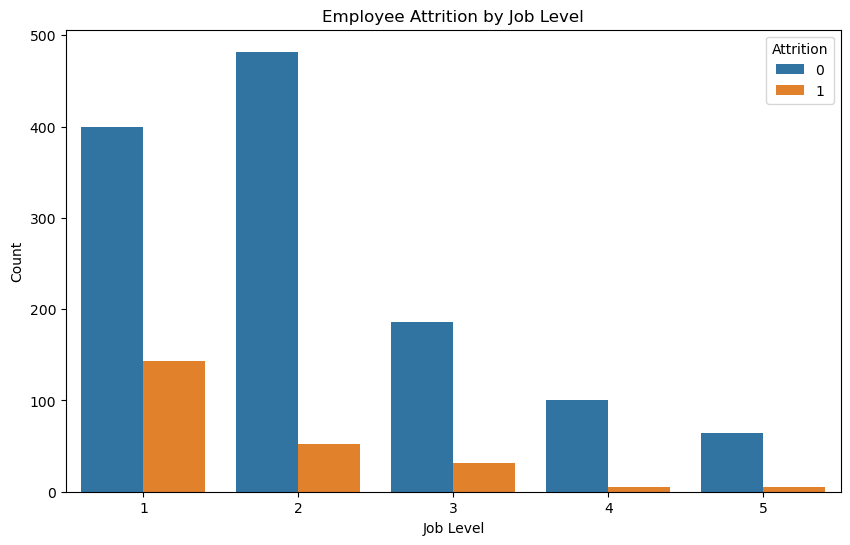

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='JobLevel', hue='Attrition', data=employee_df)
plt.title('Employee Attrition by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Count');

# Employees with lower job levels are more likely to leave the company.

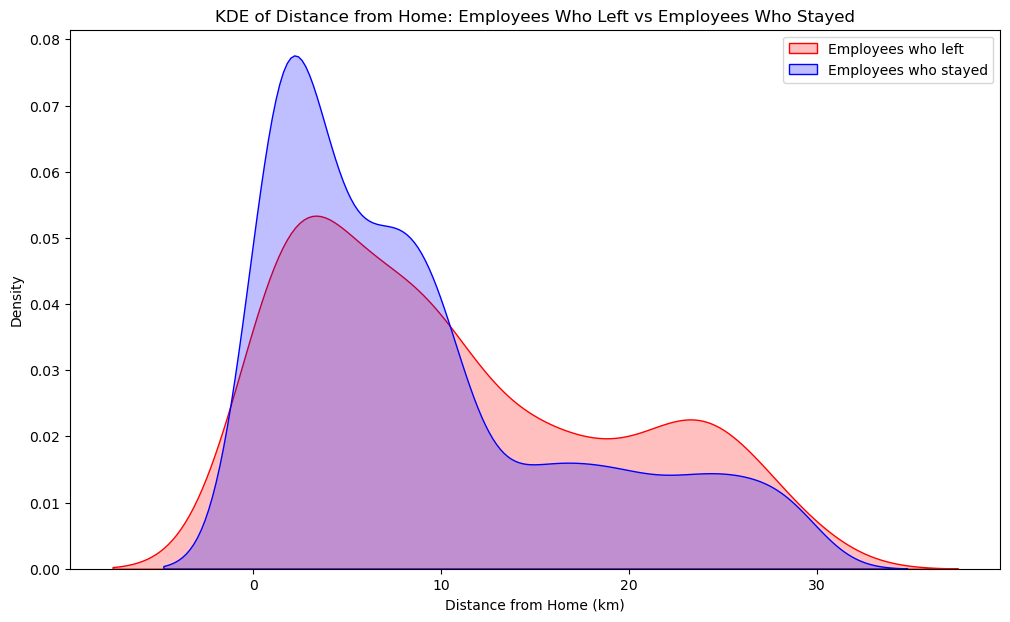

In [21]:
# KDE provides a smooth and continuous estimate of the probability density function (PDF) of a variable,
# unlike histograms which can be blocky and discrete. This smooth curve gives a clearer picture of
# the underlying data distribution, especially for continuous variables.

plt.figure(figsize=(12,7))
sns.kdeplot(employees_left['DistanceFromHome'], label='Employees who left', fill=True, color='r')
sns.kdeplot(employees_stayed['DistanceFromHome'], label='Employees who stayed', fill=True, color='b')
plt.legend()
plt.title('KDE of Distance from Home: Employees Who Left vs Employees Who Stayed')
plt.xlabel('Distance from Home (km)')
plt.ylabel('Density');

# The slight differences in the curves can indicate that employees living farther from their workplace
# may be more likely to leave.

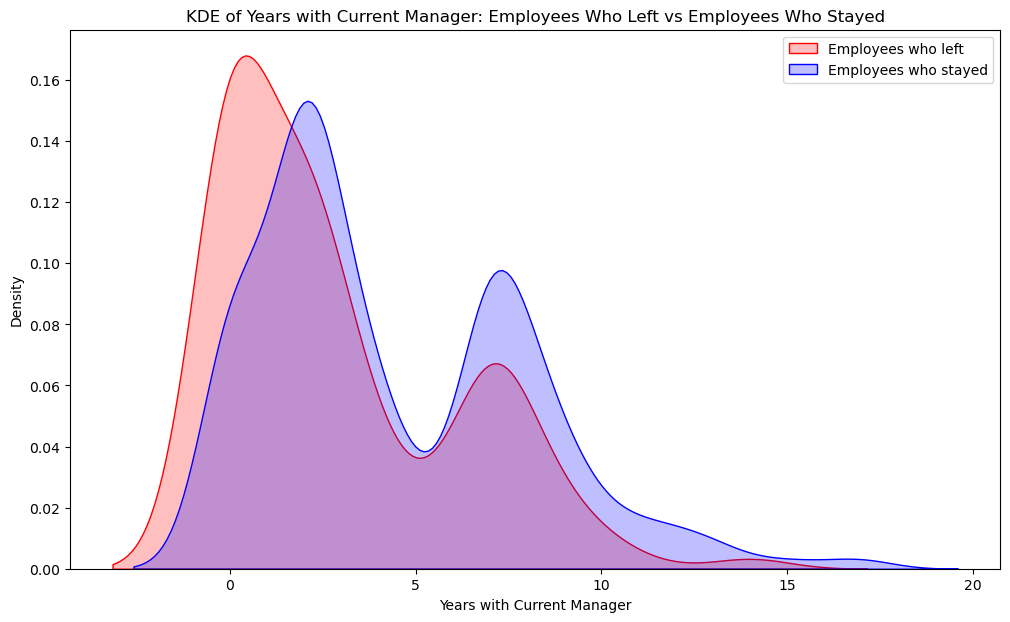

In [22]:
plt.figure(figsize=(12,7))
sns.kdeplot(employees_left['YearsWithCurrManager'], label='Employees who left', fill=True, color='r')
sns.kdeplot(employees_stayed['YearsWithCurrManager'], label='Employees who stayed', fill=True, color='b')
plt.legend()
plt.title('KDE of Years with Current Manager: Employees Who Left vs Employees Who Stayed')
plt.xlabel('Years with Current Manager')
plt.ylabel('Density');

# Employees who left tended to have fewer years with their current manager than those who stayed.

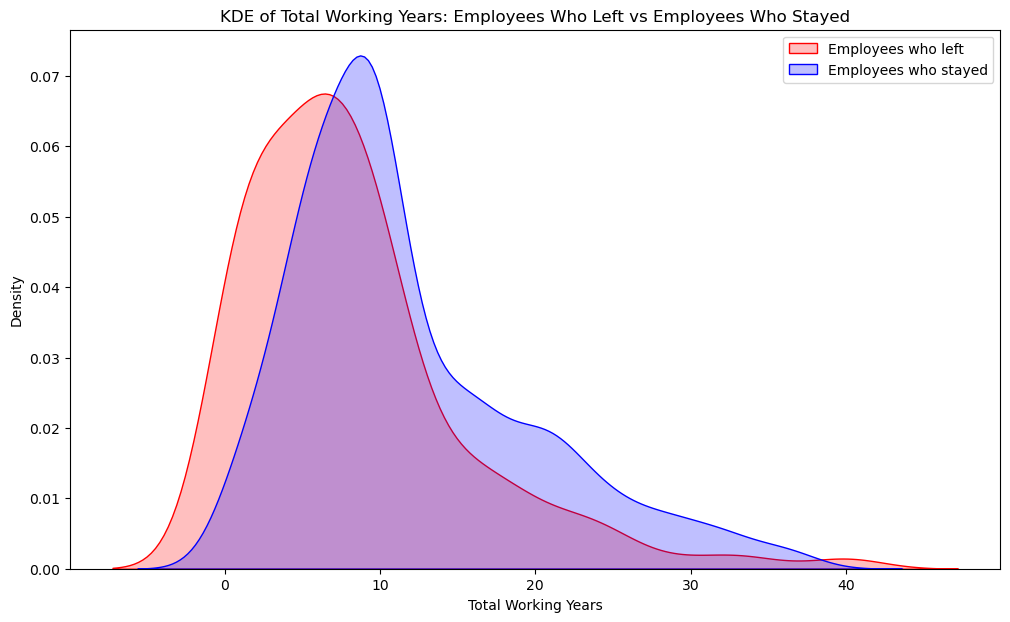

In [23]:
plt.figure(figsize=(12,7))
sns.kdeplot(employees_left['TotalWorkingYears'], label='Employees who left', fill=True, color='r')
sns.kdeplot(employees_stayed['TotalWorkingYears'], label='Employees who stayed', fill=True, color='b')
plt.legend()
plt.title('KDE of Total Working Years: Employees Who Left vs Employees Who Stayed')
plt.xlabel('Total Working Years')
plt.ylabel('Density');

# Employees who left generally had fewer total working years than those who stayed,
# with the distribution for those who stayed being more spread out towards higher total working years.

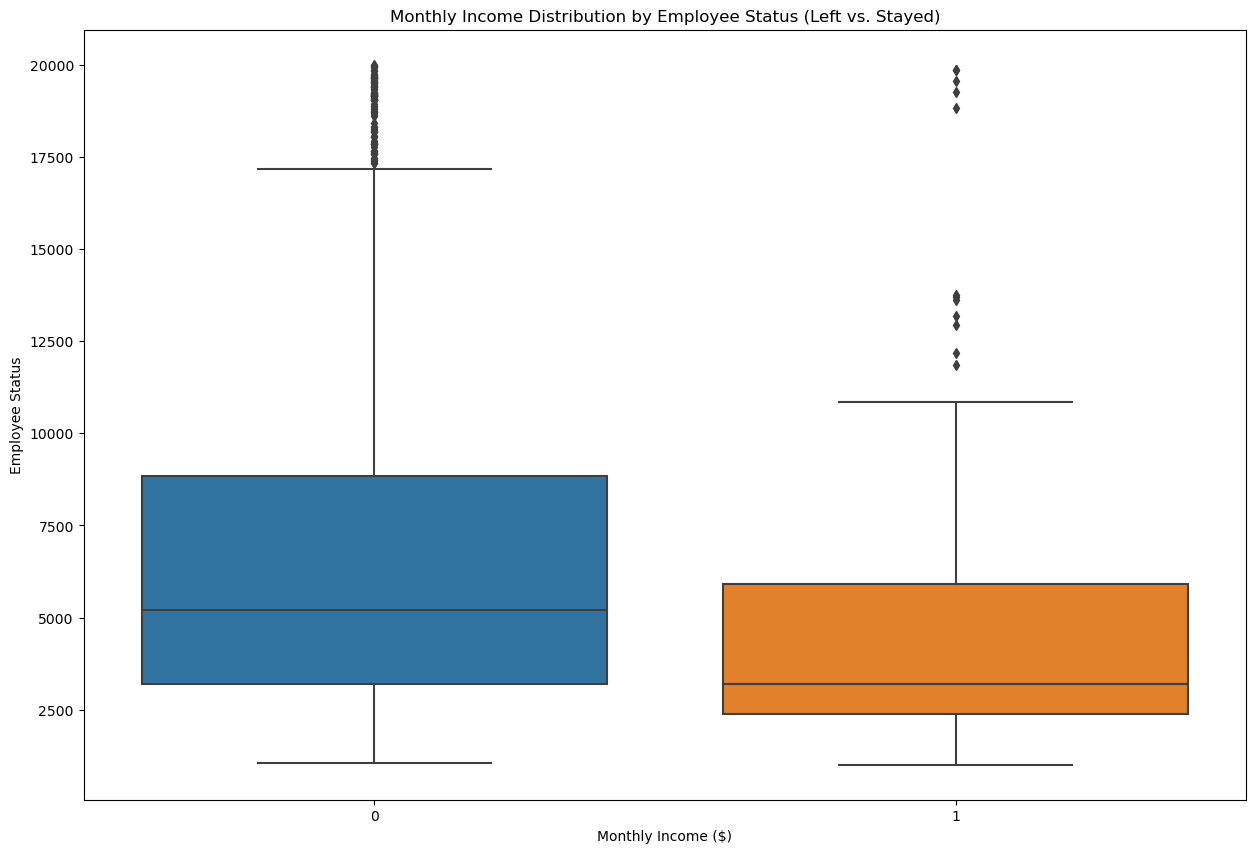

In [24]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=employee_df)
plt.title('Monthly Income Distribution by Employee Status (Left vs. Stayed)')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Employee Status');

# Employees who stayed (0) tend to have a wider distribution of monthly income,
# with higher median and upper ranges, while employees who left (1) generally have lower monthly incomes,
# as indicated by a lower median and a tighter range of values.

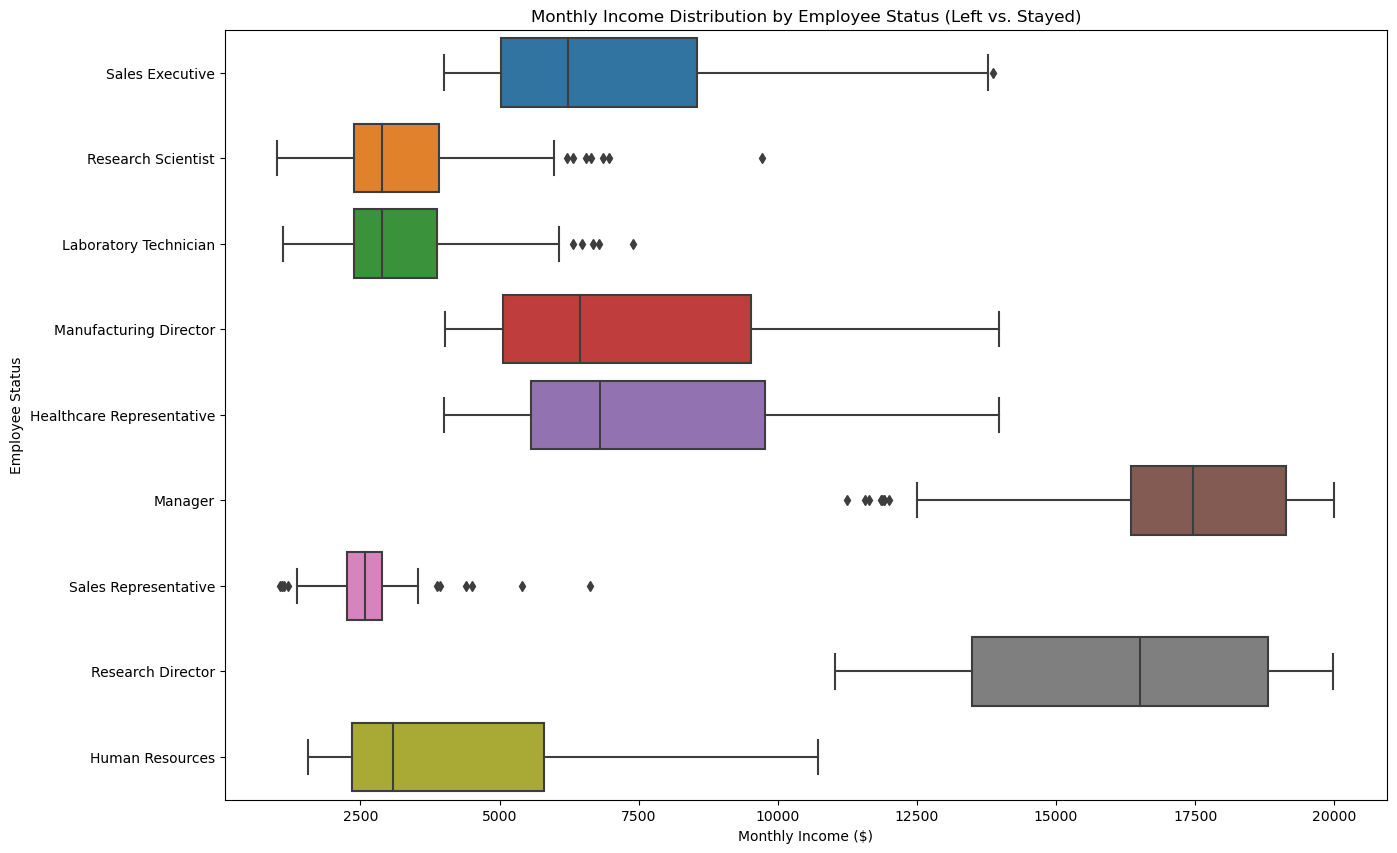

In [25]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee_df)
plt.title('Monthly Income Distribution by Employee Status (Left vs. Stayed)')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Employee Status');

# The monthly income distribution across different job roles highlights that roles such as Sales Executives
# and Research Directors have higher and broader income distributions,
# while positions like Sales Representatives and Laboratory Technicians tend to have lower and more compressed salary ranges.
# Additionally, several outliers exist across most roles, especially for Research Scientists,
# indicating some employees in these positions earn significantly more or less than the majority.

## Data Preprocessing: Splitting and Cleaning

In [27]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [28]:
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender',
                     'JobRole', 'MaritalStatus']]
X_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [29]:
encoder = OneHotEncoder()
X_cat_encoded = encoder.fit_transform(X_cat).toarray()
X_cat_encoded

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [30]:
X_cat_encoded.shape

(1470, 26)

In [31]:
X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=encoder.get_feature_names_out(X_cat.columns))
X_cat_encoded_df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
                           'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
                           'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
                           'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
                           'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                           'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                           'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                           'YearsWithCurrManager']]
X_numerical.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [33]:
scaler = MinMaxScaler()
X_numerical_scaled_df = pd.DataFrame(scaler.fit_transform(X_numerical), columns=X_numerical.columns)
X_numerical_scaled_df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,...,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,...,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,...,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,...,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,...,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [34]:
X = pd.concat([X_cat_encoded_df, X_numerical_scaled_df], axis=1)
X.columns = X.columns.astype(str) # to ensure column names are strings for consistency
X.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [35]:
y = employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [36]:
# True positives (TP): The classifier predicted TRUE, and the correct class was TRUE.
# True negatives (TN): The classifier predicted FALSE, and the correct class was FALSE.
# False positives (FP) (Type I error): The classifier predicted TRUE, but the correct class was FALSE.
# False negatives (FN) (Type II error): The classifier predicted FALSE, but the correct class was TRUE.

# Accuracy = (TP+TN)/(TP+TN+FP+FN)
# Precision = TP/Total TRUE Predictions = TP/(TP+FP) (When the classifier predicted TRUE class,
# how often was it right?)
# Recall = TP/Actual TRUE = TP/(TP+FN) (When the class was TRUE,
# how often did the classifier get it right?)

## Logistic Regression: Model Training and Evaluation

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1102, 50)
(368, 50)


In [39]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

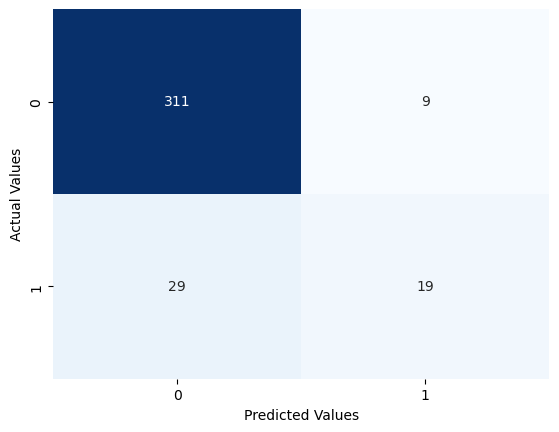

In [40]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False);
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

# The model performs well at identifying employees who stayed (high true negatives)
# but struggles more with identifying employees who left
# (lower true positives and higher false negatives).

In [41]:
print(classification_report(y_test, y_pred))

# The model performs well in identifying employees who stayed
# but struggles with identifying employees who left,
# as seen by the lower recall and F1-score for class 1.

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       320
           1       0.68      0.40      0.50        48

    accuracy                           0.90       368
   macro avg       0.80      0.68      0.72       368
weighted avg       0.88      0.90      0.88       368



## Random Forest: Model Training and Evaluation

In [43]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

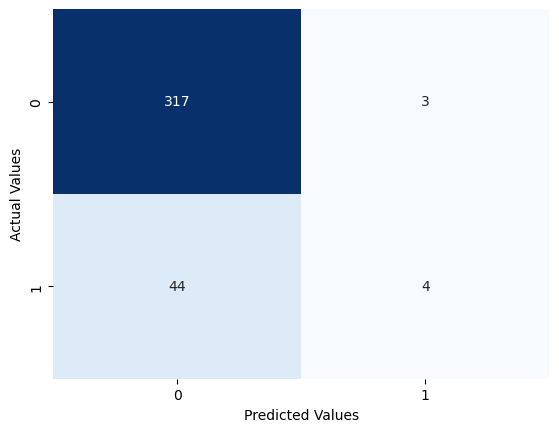

In [44]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

# The model performs well at identifying employees who stayed (high true negatives)
# but struggles more with identifying employees who left
# (lower true positives and higher false negatives).

In [45]:
print(classification_report(y_test, y_pred))

# The model performs well in identifying employees who stayed
# but struggles with identifying employees who left,
# as seen by the lower recall and F1-score for class 1.

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.57      0.08      0.15        48

    accuracy                           0.87       368
   macro avg       0.72      0.54      0.54       368
weighted avg       0.84      0.87      0.83       368



# Marketing Department: Customer Segmentation for Targeted Campaigns

## Understanding the Business Problem

The bank's marketing team has collected extensive customer data over the past six months and aims to use segmentation analysis to divide customers into at least three distinct groups for a targeted ad campaign.

## Loading Data Files

In [47]:
credit_card_df = pd.read_csv('../data/raw/marketing-department.csv')
credit_card_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [48]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [49]:
credit_card_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Exploring and Visualizing the Dataset

In [51]:
credit_card_df[credit_card_df['PURCHASES'] == 49039.570000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [52]:
credit_card_df[credit_card_df['CASH_ADVANCE'] == 47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [53]:
credit_card_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [54]:
credit_card_df.loc[(credit_card_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = credit_card_df['MINIMUM_PAYMENTS'].mean()
credit_card_df.loc[(credit_card_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = credit_card_df['CREDIT_LIMIT'].mean()

In [55]:
credit_card_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [56]:
credit_card_df.duplicated().sum()

0

In [57]:
credit_card_df.drop('CUST_ID', axis = 1, inplace = True)
credit_card_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [58]:
len(credit_card_df.columns)

17

In [59]:
credit_card_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

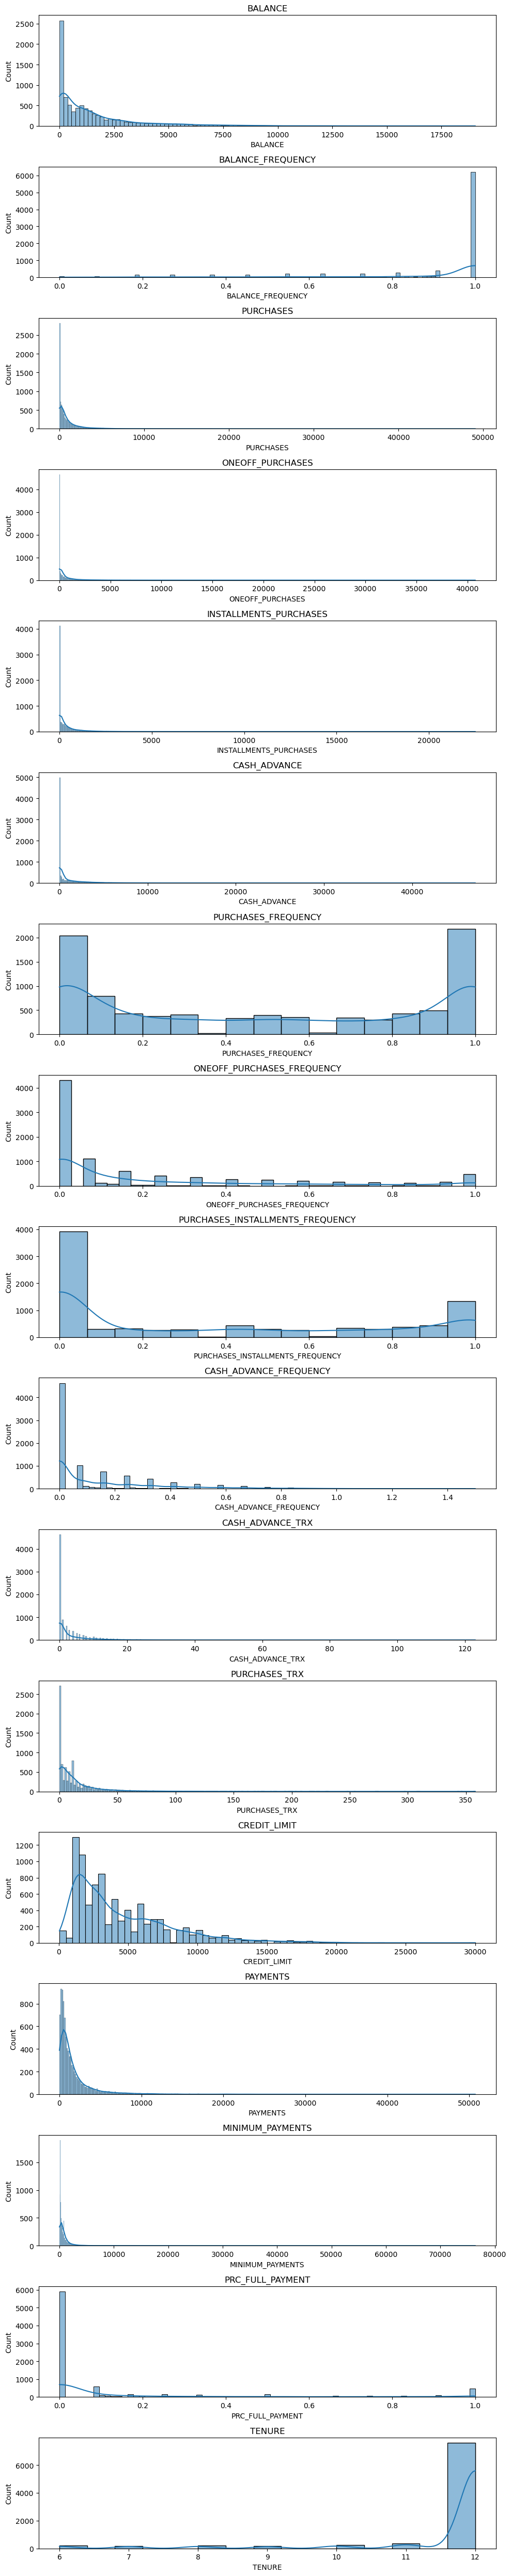

In [60]:
plt.figure(figsize=(10, 50))
for i in range(len(credit_card_df.columns)):
    # Create a subplot for each column
    plt.subplot(len(credit_card_df.columns), 1, i + 1)
    # Plot the histogram with KDE (Kernel Density Estimate)
    sns.histplot(credit_card_df[credit_card_df.columns[i]], kde=True)
    # Add a title for each subplot using the column name
    plt.title(credit_card_df.columns[i])
plt.tight_layout()

In [61]:
# The "BALANCE" histogram shows that the majority of customers have very low balances, with a sharp peak near zero.
# The distribution has a long right tail, indicating that a few customers have significantly higher balances.

# The histogram for "BALANCE_FREQUENCY" indicates that most customers have a frequency value of 1, suggesting consistent account balance usage.
# The distribution shows very low counts for other frequency values, with a gradual increase toward the peak at 1.

# The "PURCHASES" histogram shows that the majority of customers have very low purchase amounts, with a steep decline as the purchase values increase.
# The distribution has a long right tail, indicating a small number of customers with significantly higher purchase amounts.

# The "ONEOFF_PURCHASES" histogram shows that most customers have very low values, with the majority clustered near zero.
# The distribution has a long right tail, indicating that a small group of customers makes significantly higher one-off purchases.

# The "INSTALLMENTS_PURCHASES" histogram reveals that most installment purchase values are close to zero, with a steep decline as the values increase.
# The distribution also exhibits a long right tail, showing a small number of customers with much higher installment purchases.

# The "CASH_ADVANCE" histogram shows that most customers take out very small cash advances, with a sharp peak near zero.
# A few customers, as indicated by the long right tail, take out significantly larger cash advances.

# The "PURCHASES_FREQUENCY" histogram demonstrates that most customers either have a frequency close to 0 or 1, representing infrequent or very regular purchases.
# The distribution dips in the middle, suggesting fewer customers have moderate purchase frequencies.

# The "ONEOFF_PURCHASES_FREQUENCY" histogram shows that most customers have a frequency close to 0, indicating infrequent one-off purchases.
# A small number of customers have a frequency near 1, suggesting consistent one-off purchasing behavior.

# The "PURCHASES_INSTALLMENTS_FREQUENCY" histogram highlights that most customers have a frequency close to 0, reflecting infrequent installment-based purchases.
# There is a smaller peak near 1, indicating a subset of customers with consistent installment purchasing behavior.

# The "CASH_ADVANCE_FREQUENCY" histogram shows that most customers have a frequency near 0, indicating infrequent use of cash advances.
# A small number of customers exhibit higher frequencies, though the counts drop significantly as the frequency increases.

# The "CASH_ADVANCE_TRX" histogram reveals that most customers have completed very few cash advance transactions, with a steep decline as the number of transactions increases.
# A small portion of customers performs a higher number of transactions, as indicated by the long right tail.

# The "PURCHASES_TRX" histogram shows that most customers have completed very few purchase transactions, with a sharp peak near zero.
# The distribution has a long right tail, indicating a small number of customers with a significantly higher number of transactions.

# The "CREDIT_LIMIT" histogram shows that most customers have a credit limit between 0 and 5,000, with the highest count in this range.
# The distribution decreases steadily as the credit limit increases, with very few customers having limits above 15,000.

# The "PAYMENTS" histogram indicates that the majority of customers make low payment amounts, with a sharp peak near zero.
# A long right tail suggests that a small number of customers make significantly higher payments.

# The "MINIMUM_PAYMENTS" histogram shows that most customers pay very low minimum amounts, with a steep peak near zero.
# There is a long right tail, indicating a small number of customers who pay significantly higher minimum amounts.

# The "PRC_FULL_PAYMENT" histogram reveals that the majority of customers rarely pay their balance in full, with a sharp peak near 0.
# A small group of customers, represented by a smaller peak near 1, consistently pays their balance in full.

# The "TENURE" histogram shows that the majority of customers have a tenure of 12 years, represented by a sharp peak at 12.
# Other tenure values, ranging from 6 to 11 years, are significantly less common, with minimal counts.

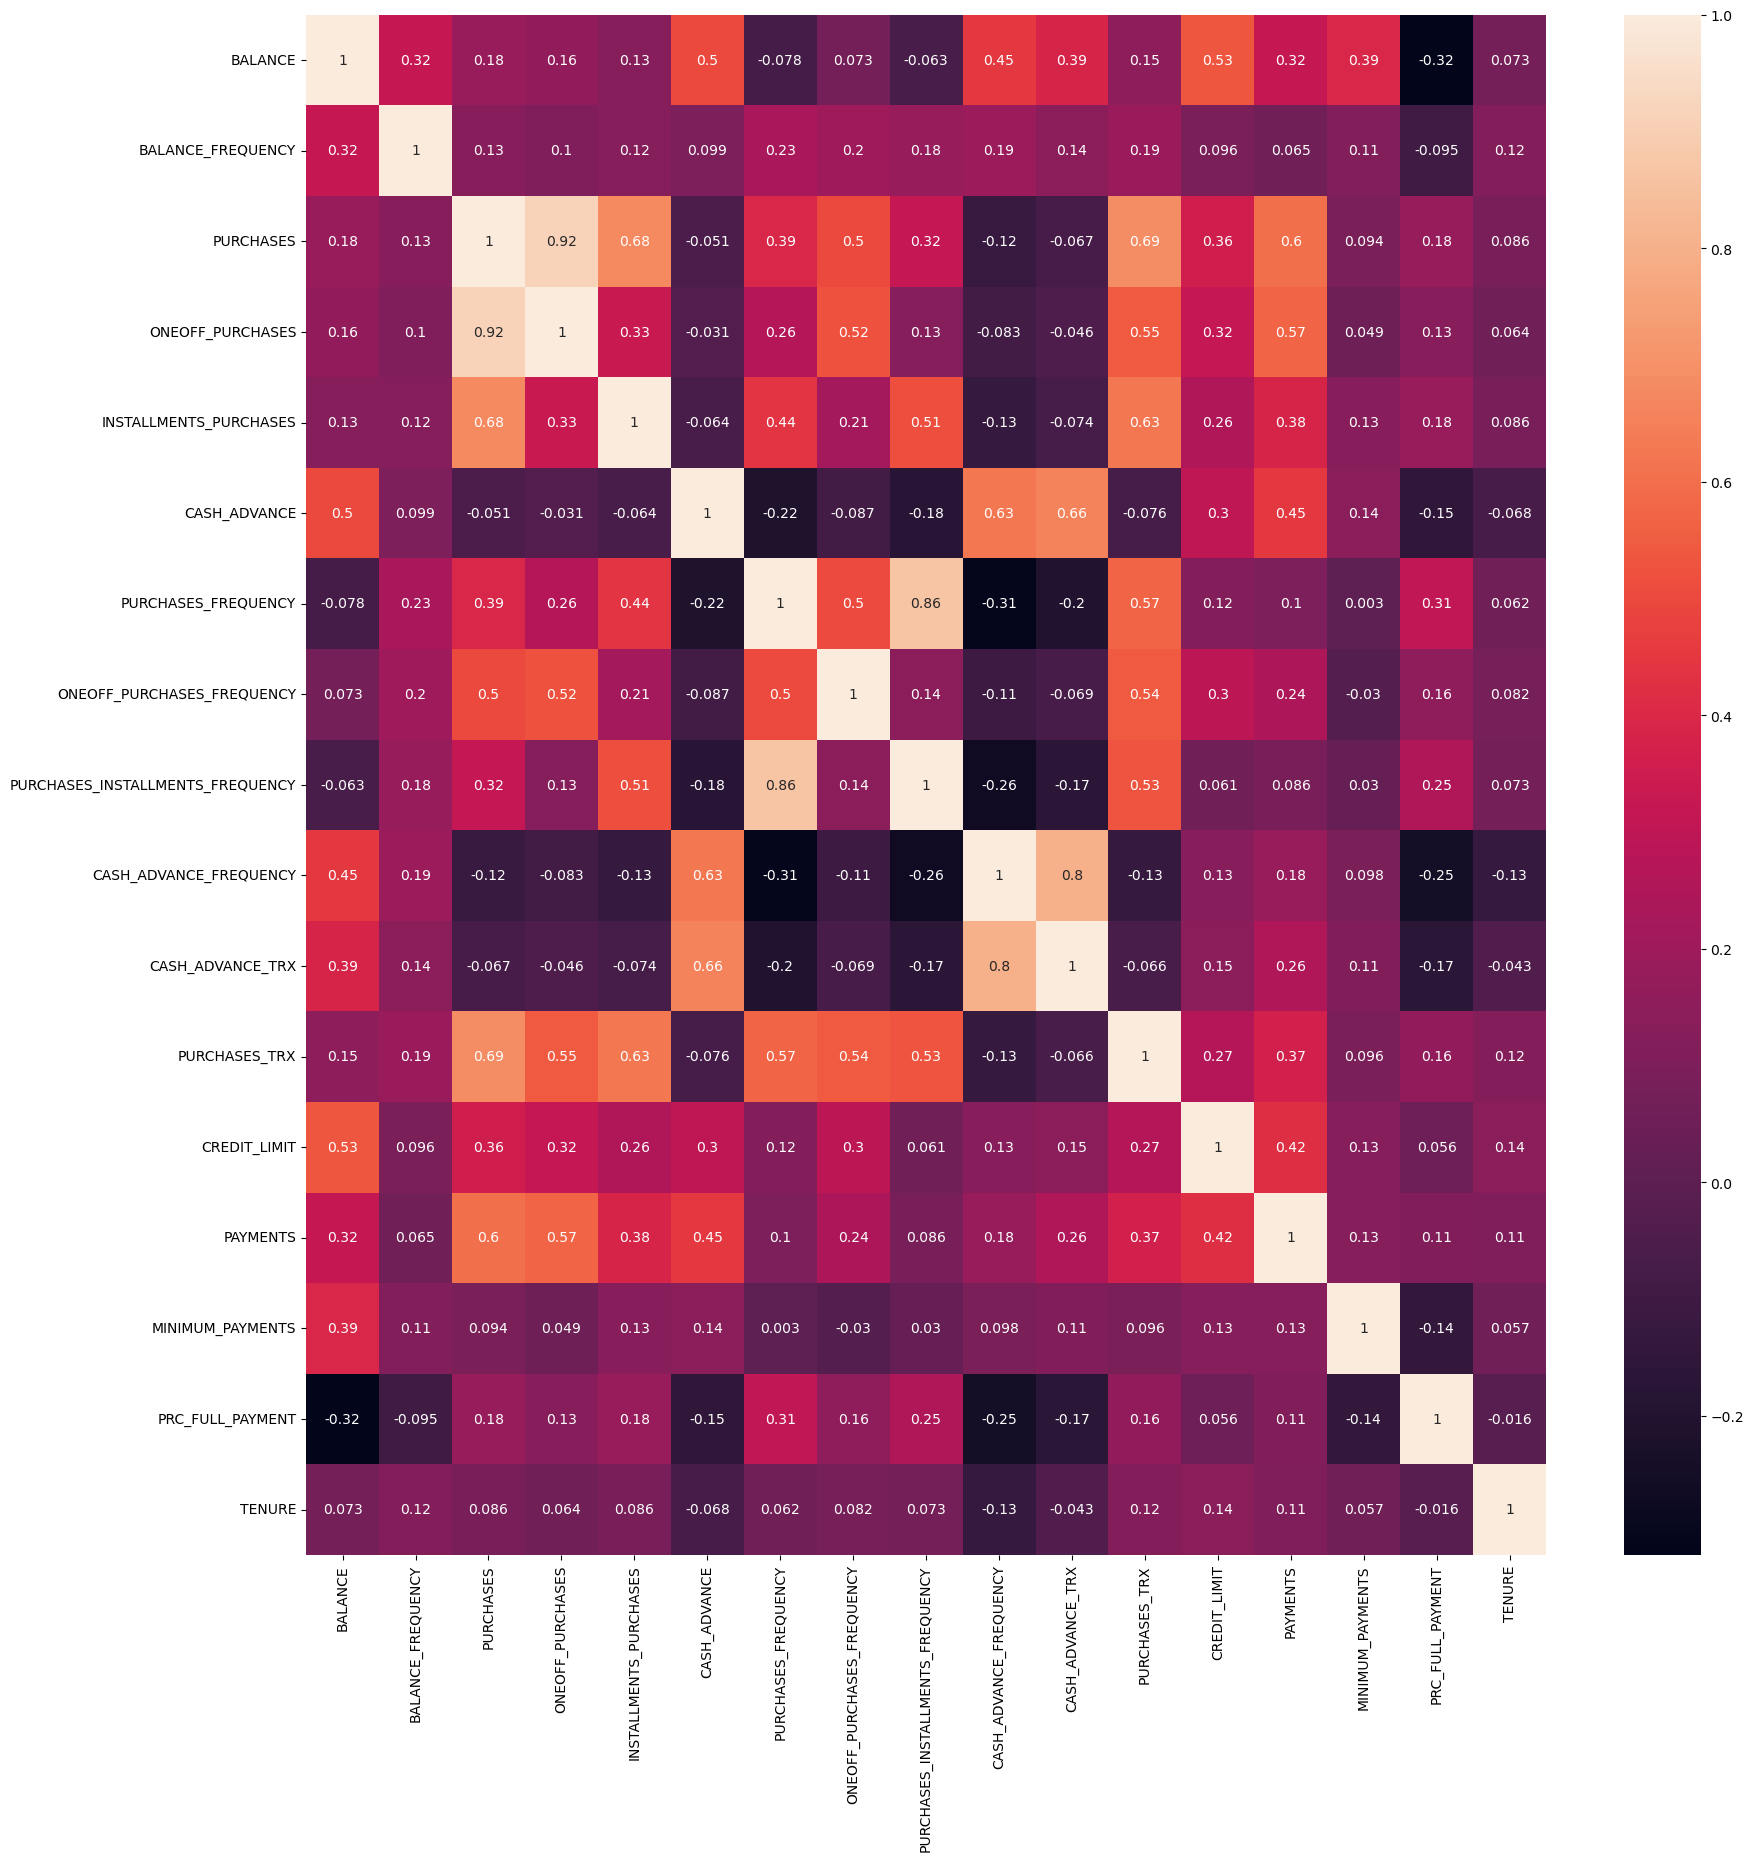

In [62]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(credit_card_df.corr(), annot=True);

# The correlation matrix reveals several key relationships between the variables.
# Variables like BALANCE and CREDIT_LIMIT have a strong positive correlation (0.531),
# indicating that higher credit limits are associated with higher balances.
# Similarly, PURCHASES and ONEOFF_PURCHASES are highly correlated (0.917),
# suggesting that one-off purchases contribute significantly to the overall purchase amounts.
# On the other hand, variables like PRC_FULL_PAYMENT and BALANCE show a negative correlation (-0.319),
# indicating that customers with high balances are less likely to pay their balances in full.

## Finding the Optimal Number of Clusters and Applying the K-Means Method

In [64]:
# The K-means algorithm clusters observations with similar attribute values
# by calculating the Euclidean distance between points.

# K-Means clustering:
# 1. Select the Number of Clusters (k): Decide how many clusters the data should be grouped into.
# 2. Initialize Centroids: Randomly place k initial centroids in the data space.
# 3. Assign Points to Clusters: Assign each data point to the nearest centroid based on a distance metric (e.g., Euclidean distance).
# 4. Update Centroids: Recalculate the centroid of each cluster by taking the mean of all points assigned to that cluster.
# 5. Iterate Until Convergence: Repeat steps 3 and 4 until centroids stabilize (no significant change) or a maximum number of iterations is reached.

# The Elbow Method helps determine the optimal number of clusters (k) for K-Means.
# 1. Run K-Means for a range of k values.
# 2. Calculate the Sum of Squared Errors (SSE) for each k.
# 3. Plot SSE vs. k and identify the "elbow point," where SSE sharply decreases and then levels off. The "elbow" represents the ideal number of clusters.

In [65]:
scaler = StandardScaler()
credit_card_df_scaled = scaler.fit_transform(credit_card_df)
credit_card_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

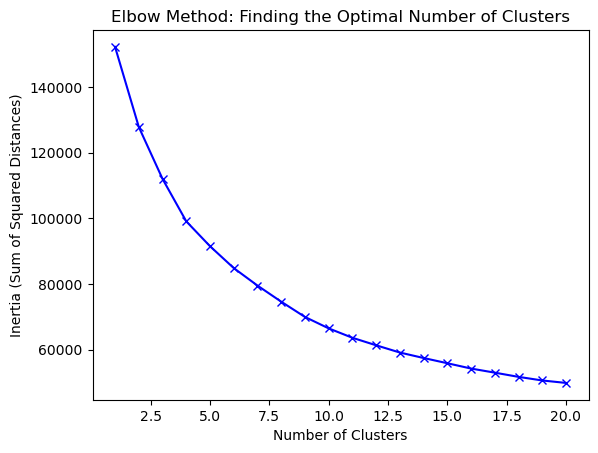

In [66]:
inertia_scores = []
cluster_range = range(1, 21)
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(credit_card_df_scaled)
    inertia_scores.append(kmeans.inertia_)

plt.plot(cluster_range, inertia_scores, 'bx-')
plt.title('Elbow Method: Finding the Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)');

# The "elbow" appears to be around 4 or 5 clusters. Choosing 4 or 5 clusters would balance
# minimizing inertia while avoiding overfitting with too many clusters.

In [67]:
kmeans = KMeans(4)
kmeans.fit(credit_card_df_scaled)
labels = kmeans.labels_

# The statement labels = kmeans.labels_ is used to retrieve the cluster labels assigned by
# the K-Means algorithm to each data point after the clustering process is completed. => 0, 1, 2, 3

In [68]:
kmeans.cluster_centers_.shape

# Rows (4): This represents the number of clusters (k) you specified when running the K-Means algorithm.
# In this case, there are 4 clusters, so the output contains 4 rows,
# with each row corresponding to the centroid (center) of a cluster.
# Columns (17): This represents the number of features (or dimensions) in your dataset.
# In this case, the dataset has 17 features, so each centroid is a point in 17-dimensional space.

(4, 17)

In [74]:
# Convert the cluster centers (scaled values) into a DataFrame with column names matching the original dataset
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[credit_card_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.321688,0.242574,0.109044,0.000926,0.255904,-0.366373,0.983721,0.317153,0.874138,-0.462599,-0.360303,0.296985,-0.077298,-0.138502,-0.091844,0.395041,0.057744
1,-0.265552,-0.368944,-0.343190,-0.230500,-0.387798,-0.182691,-0.797823,-0.389437,-0.714246,-0.101500,-0.164607,-0.474987,-0.334417,-0.262060,-0.119249,-0.258866,-0.052972
2,1.459578,0.384753,-0.234638,-0.163914,-0.253747,1.688972,-0.504848,-0.212939,-0.450201,1.745948,1.617143,-0.283580,0.838968,0.603821,0.490910,-0.406367,-0.097146
3,0.954485,0.462694,3.125845,2.713251,2.406470,-0.155091,1.136338,1.798653,1.065918,-0.319096,-0.170458,3.003251,1.429882,1.919096,0.477421,0.454703,0.324140


In [76]:
# Transform the cluster centers back to the original scale (undo the scaling applied earlier)
cluster_centers = scaler.inverse_transform(cluster_centers)
# Convert the inverse-transformed cluster centers into a DataFrame with the same column names as the original dataset
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[credit_card_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
1,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
2,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
3,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100


In [78]:
# Cluster 0:
# Customers in this cluster have moderate average balances, frequently check their balance,
# and show significant spending on purchases split between one-off and installment payments,
# with minimal cash advances and a high tenure.

# Cluster 1:
# This cluster consists of customers with low balances, less frequent balance checks,
# low overall purchases and one-off purchases, and a higher reliance on cash advances
# with a slightly lower tenure than Cluster 0.

# Cluster 2:
# Customers in this cluster have very high balances, check their balances regularly,
# exhibit moderate spending on purchases, rely heavily on cash advances,
# and have substantial credit limits and payments with medium tenure.

# Cluster 3:
# These customers show very high purchases (especially one-off and installment-based), high balances,
# frequent balance checking, minimal reliance on cash advances, very high credit limits and payments,
# and the highest tenure among all clusters.

In [84]:
print(labels.shape) # This will show the number of data points that were clustered.
print(labels.max()) # This will give the highest cluster number assigned by K-Means.
print(labels.min()) # This confirms that cluster labels start from 0.

(8950,)
3
0


In [86]:
credit_card_df_cluster = pd.concat([credit_card_df, pd.DataFrame({'CLUSTER': labels})], axis=1)
credit_card_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
